## Congressional voting dataset

### Importing the datasets and the required packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier



traindata = pd.read_csv(r'C:\Users\noahw\OneDrive\Desktop\machinelearning\CongressionalVotingID.shuf.lrn.csv', na_values=['unknown']) 
testdata = pd.read_csv(r'C:\Users\noahw\OneDrive\Desktop\machinelearning\CongressionalVotingID.shuf.tes.csv', na_values=['unknown'])
resultdata = pd.read_csv(r'C:\Users\noahw\OneDrive\Desktop\machinelearning\CongressionalVotingID.shuf.sol.ex.csv') 

### Data exploration

In [31]:
traindata.head()


,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,356,republican,y,n,y,y,n,n,n,y,y,y,n,n,n,y,y,y
1,29,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
2,344,republican,n,n,n,y,y,n,y,n,y,y,n,n,n,y,n,y
3,396,democrat,y,y,y,NaN,n,n,n,y,n,n,y,NaN,n,n,y,y
4,32,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,NaN


In [32]:
traindata.info()
traindata.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      218 non-null    int64 
 1   class                                   218 non-null    object
 2   handicapped-infants                     211 non-null    object
 3   water-project-cost-sharing              194 non-null    object
 4   adoption-of-the-budget-resolution       209 non-null    object
 5   physician-fee-freeze                    211 non-null    object
 6   el-salvador-aid                         212 non-null    object
 7   religious-groups-in-schools             213 non-null    object
 8   anti-satellite-test-ban                 211 non-null    object
 9   aid-to-nicaraguan-contras               213 non-null    object
 10  mx-missile                              209 non-null    object
 11  immigr

ID                                         0
class                                      0
handicapped-infants                        7
water-project-cost-sharing                24
adoption-of-the-budget-resolution          9
physician-fee-freeze                       7
el-salvador-aid                            6
religious-groups-in-schools                5
anti-satellite-test-ban                    7
aid-to-nicaraguan-contras                  5
mx-missile                                 9
immigration                                2
synfuels-crporation-cutback               12
education-spending                        15
superfund-right-to-sue                    12
crime                                      8
duty-free-exports                         19
export-administration-act-south-africa    50
dtype: int64

In [33]:
traindata['class'].value_counts()

democrat      138
republican     80
Name: class, dtype: int64

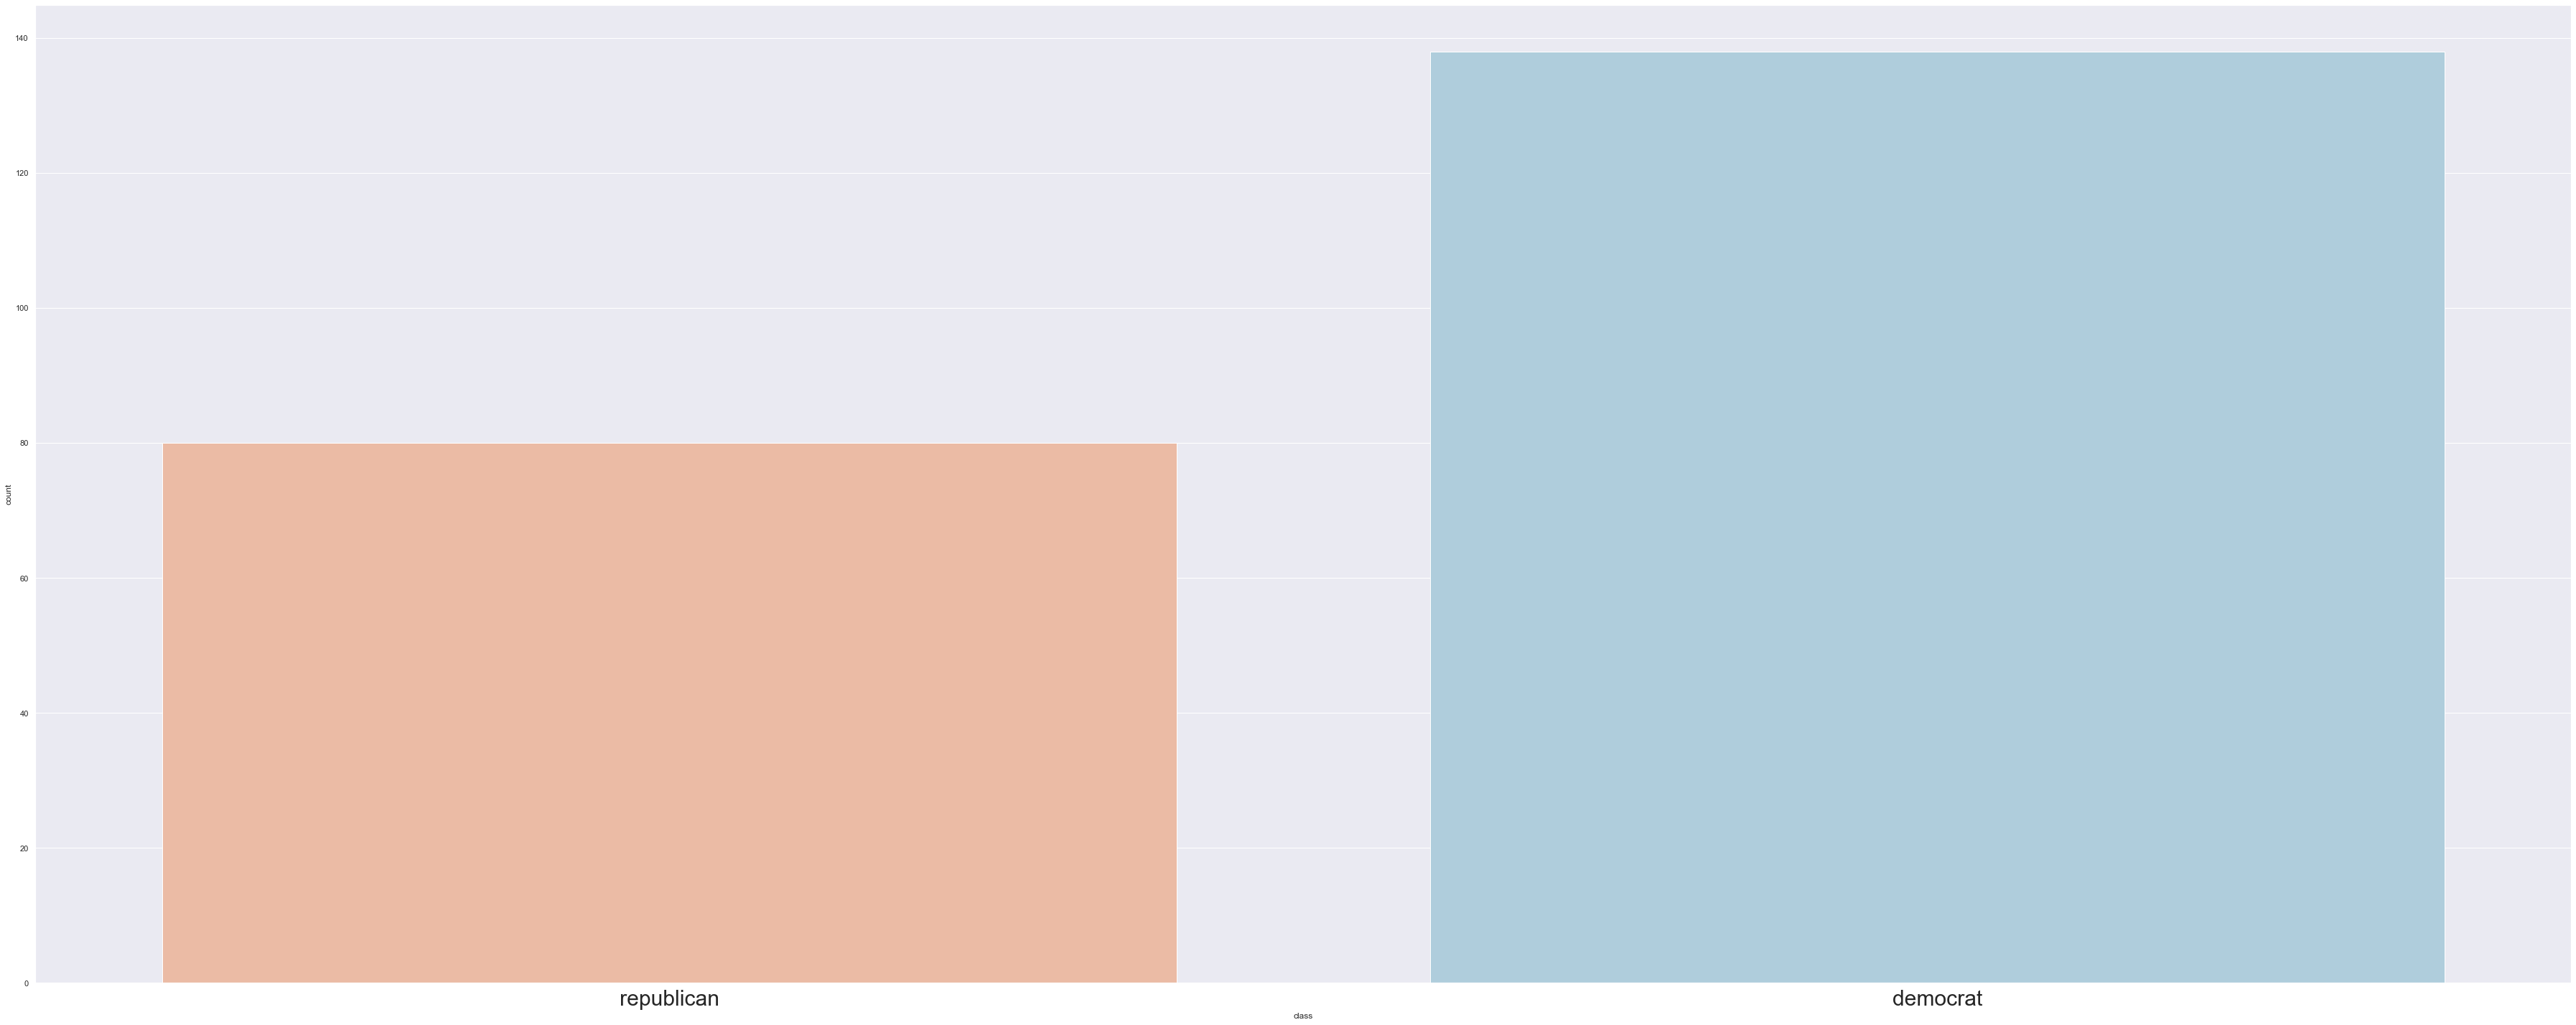

In [34]:
plt.figure(figsize = (50,20))
sns.set(style="darkgrid")
ax = sns.countplot(x='class',data=traindata, palette='RdBu')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30)
plt.tight_layout()

In [35]:

traindata.replace(('y', 'n'), (1, 0), inplace=True)
testdata.replace(('y', 'n'), (1, 0), inplace=True)
traindata.head()


,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,356,republican,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,29,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,344,republican,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,396,democrat,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0
4,32,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


In [36]:
traindata = traindata.drop('ID', axis=1)

In [37]:
traindata.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,republican,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,democrat,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0
4,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


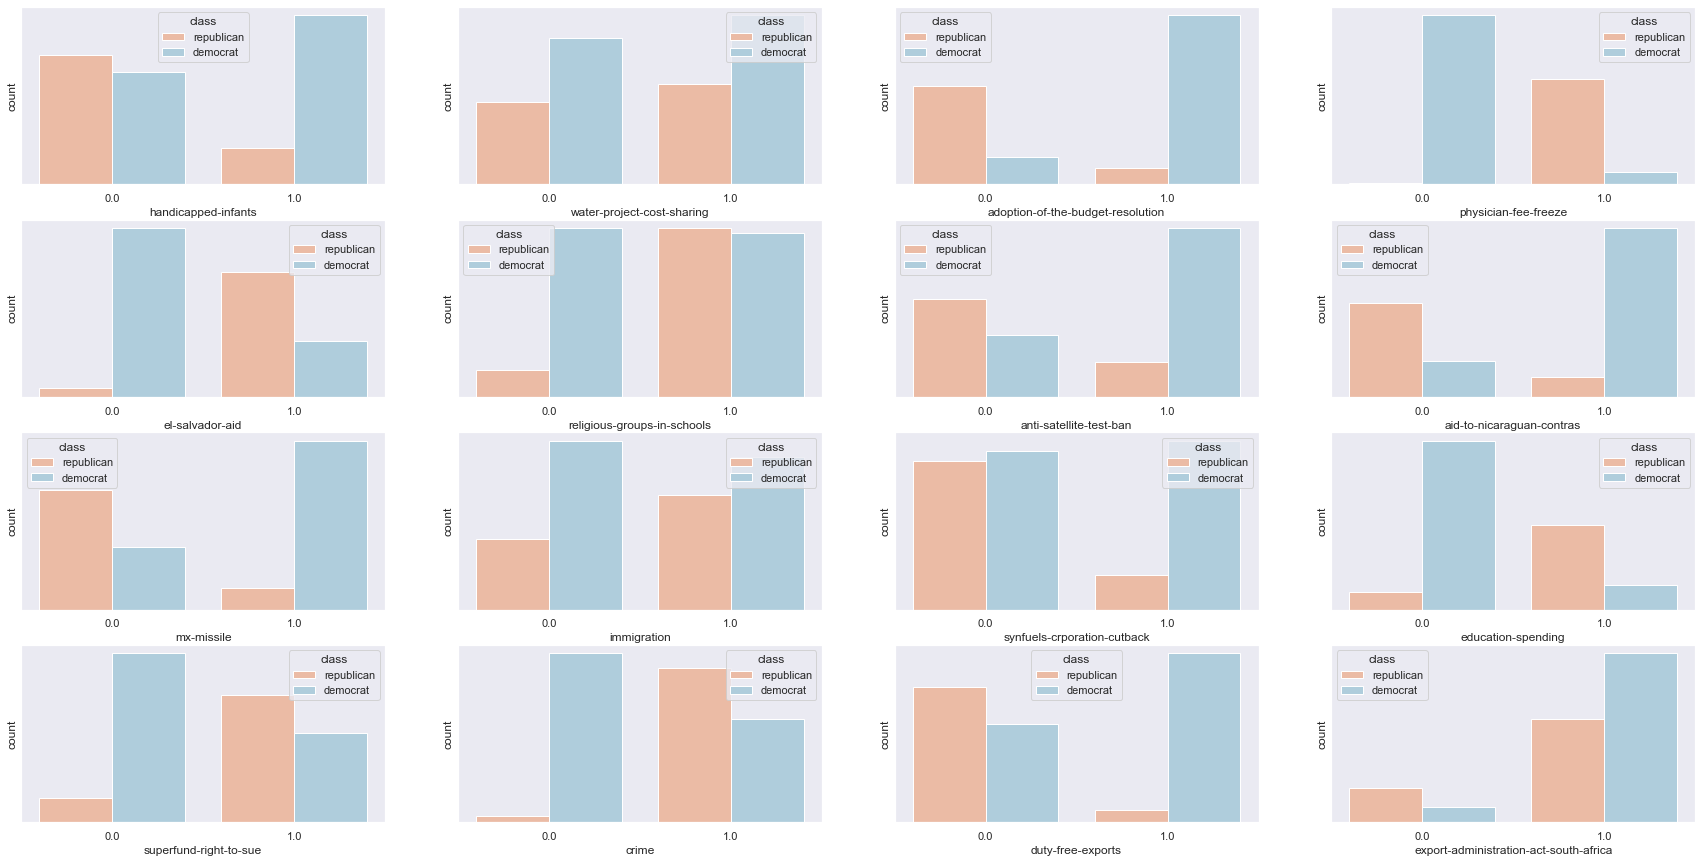

In [38]:
ind = traindata.drop('class',axis=1).columns 

z = 0
fig, axes = plt.subplots(4, 4, figsize=(30, 15))
for i in range(4): 

    for j in range(4):        
        sns.countplot(x = ind[z+j], hue='class', data=traindata, palette='RdBu', ax=axes[i][j])
    
        axes[i][j].set_yticks([])
    z = z + j + 1
plt.show()


## Preprocessing of the dataset

In [39]:
traindata.replace(('democrat', 'republican'), (0, 1), inplace=True)
resultdata.replace(('democrat', 'republican'), (0, 1), inplace=True)

In [40]:
y = traindata['class'].values
X = traindata.drop('class', axis=1).values
resultdata = resultdata.drop('ID', axis=1).values
Y = testdata



In [41]:
imp = SimpleImputer(strategy="most_frequent")
X = imp.fit_transform(X)


In [42]:
imp = SimpleImputer(strategy="most_frequent")
Y =  imp.fit_transform(Y)

In [43]:
traindata.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0
4,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


## Splitting the dataset

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Classfiers


### k-NN Classifier

In [16]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc

0.8636363636363636

In [17]:
matrix = confusion_matrix(y_test,y_prediction)
matrix

array([[40,  5],
       [ 4, 17]], dtype=int64)

<AxesSubplot:>

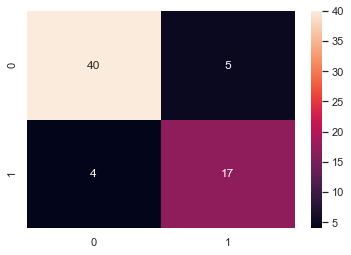

In [18]:
sns.heatmap(matrix, annot=True)

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100, random_state=0, max_features="sqrt")
clf1.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [46]:
y_pred=clf1.predict(X_test)

In [47]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9090909090909091


0.9242424242424242
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091


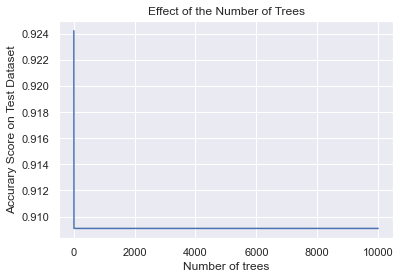

In [50]:
#trying to find the right number of iterations

import matplotlib.pyplot as plt

trees = [5, 10, 100, 1000, 2000, 3000, 5000, 10000]
scores = []
for tree in trees:
    model = RandomForestClassifier(min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf = 0.000000000000000001, bootstrap=True, n_estimators=tree)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Trees")
plt.xlabel("Number of trees")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(trees, scores)

In [197]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix


array([[43,  0],
       [ 4, 19]], dtype=int64)

<AxesSubplot:>

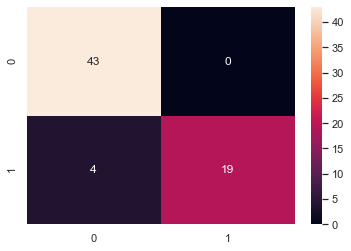

In [198]:
sns.heatmap(matrix, annot=True)

### Logistic Regression Classifier

In [199]:

#creating the model
model = LogisticRegression(random_state=42, solver='newton-cg',multi_class='ovr', warm_start=True, class_weight='dict', max_iter=50000).fit(X, y)

#fitting data to the model
model.fit(X_train, y_train)



#calculating the probabilities
y_pred_proba = model.predict_proba(X_test)



#printing the accuarcy

accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

0.9671052631578947
0.9545454545454546


c:\users\noahw\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\noahw\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


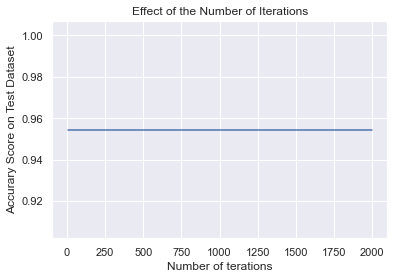

In [200]:
import matplotlib.pyplot as plt

interations = [5, 10, 25, 50, 100, 500, 1000, 2000]
scores = []
for interation in interations:
    model =  LogisticRegression(random_state=42, solver='newton-cg', warm_start=True, class_weight='balanced', intercept_scaling= 10, max_iter=interation)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Iterations")
plt.xlabel("Number of terations")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(interations, scores)

In [201]:
matrix = confusion_matrix(y_test,y_pred)
matrix


array([[43,  0],
       [ 4, 19]], dtype=int64)

<AxesSubplot:>

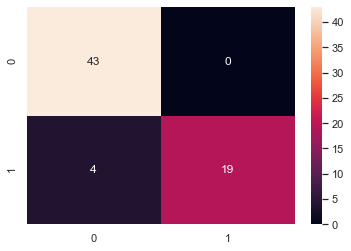

In [202]:
sns.heatmap(matrix, annot=True)

In [203]:

X_end_test = testdata.values

imp = SimpleImputer(strategy="most_frequent")
X_end_test = imp.fit_transform(X_end_test)

prediction = model.predict(X_end_test)
prediction = pd.DataFrame(prediction)

prediction = prediction.rename({0: 'class'}, axis='columns')
prediction.replace((0, 1), ('democrat', 'republican'), inplace=True)
prediction

,class
0,republican
1,republican
2,democrat
3,republican
4,republican
...,...
212,democrat
213,republican
214,democrat
215,democrat


In [204]:
solution = pd.DataFrame(X_end_test)
solution = solution.rename({0: 'id'}, axis='columns')
solution = pd.DataFrame(solution['id'])
solution

,id
0,107.0
1,241.0
2,51.0
3,428.0
4,376.0
...,...
212,253.0
213,306.0
214,263.0
215,65.0


In [205]:
solution = pd.merge(solution, prediction, left_index=True, right_index=True)
solution


solution.id = solution.id.astype(int)
#pd.options.display.float_format = '{:,.0f}'.format
solution

,id,class
0,107,republican
1,241,republican
2,51,democrat
3,428,republican
4,376,republican
...,...,...
212,253,democrat
213,306,republican
214,263,democrat
215,65,democrat


In [206]:
solution.to_csv('solution-group6.csv', sep=',', index=False)